## 서울시 지하철 역별 이용개수 데이터에서 다음을 계산하세요

### 1.각 지하철 역별 평균 이용객수

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%precision 3
import koreanize_matplotlib

In [13]:
Df = pd.read_csv('./서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='cp949')
Df1=Df[Df['사용일자'] == 20240212]
Df1

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20240212,우이신설선,4.19민주묘지,1964,1773,20240215
1,20240212,경원선,가능,3917,3600,20240215
2,20240212,3호선,가락시장,3871,4054,20240215
3,20240212,8호선,가락시장,3306,4148,20240215
4,20240212,7호선,가산디지털단지,10044,10367,20240215
...,...,...,...,...,...,...
608,20240212,경원선,회룡,7555,7235,20240215
609,20240212,4호선,회현(남대문시장),11719,12414,20240215
610,20240212,경의선,효창공원앞,1161,1565,20240215
611,20240212,6호선,효창공원앞,3131,2862,20240215


In [16]:
Df1['이용객수'] = Df1['승차총승객수'] + Df1['하차총승객수']
Df1

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_24336\1539905905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df1['이용객수'] = Df1['승차총승객수'] + Df1['하차총승객수']


,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,이용객수
0,20240212,우이신설선,4.19민주묘지,1964,1773,20240215,3737
1,20240212,경원선,가능,3917,3600,20240215,7517
2,20240212,3호선,가락시장,3871,4054,20240215,7925
3,20240212,8호선,가락시장,3306,4148,20240215,7454
4,20240212,7호선,가산디지털단지,10044,10367,20240215,20411
...,...,...,...,...,...,...,...
608,20240212,경원선,회룡,7555,7235,20240215,14790
609,20240212,4호선,회현(남대문시장),11719,12414,20240215,24133
610,20240212,경의선,효창공원앞,1161,1565,20240215,2726
611,20240212,6호선,효창공원앞,3131,2862,20240215,5993


In [20]:
Df1['이용객수'].mean()         # 이용객수 평균값

12281.119

### 2.각 지하철 역별 이용객수의 표준편차

In [24]:
Df1['이용객수'].std(ddof=0)        # 표준편차

13033.649

### 3.가장 많은 이용객이 있는 역의 이용객수

In [29]:
Df1.set_index('역명', inplace=True)

In [30]:
Df1['이용객수'].idxmax()

'홍대입구'

In [31]:
Df1.loc['홍대입구']        # 같은 역명이라도 합칠 필요가 있다.

,사용일자,호선명,승차총승객수,하차총승객수,등록일자,이용객수
역명,,,,,,
홍대입구,20240212,경의선,1807,2409,20240215,4216
홍대입구,20240212,2호선,61416,61094,20240215,122510
홍대입구,20240212,공항철도 1호선,13371,13044,20240215,26415


In [61]:
Df2 = Df1.groupby('역명').sum()[['승차총승객수','하차총승객수','이용객수']]
Df2

,승차총승객수,하차총승객수,이용객수
역명,,,
4.19민주묘지,1964,1773,3737
가능,3917,3600,7517
가락시장,7177,8202,15379
가산디지털단지,15263,17421,32684
가양,9554,10492,20046
...,...,...,...
회기,12204,14013,26217
회룡,7555,7235,14790
회현(남대문시장),11719,12414,24133


### 1. 평균값

In [62]:
Df2['이용객수'].mean()         # 이용객수 진짜 평균값

14312.407

### 2.표준편차

In [63]:
Df2['이용객수'].std()

17335.791

### 3.가장 많은 이용객이 있는 역

In [70]:
Df2['이용객수'].max()

153141

### 4.가장 적은 이용객이 있는 역과 그 수

In [69]:
Df2['이용객수'].min()

13

### 5.이용객수가 가장 많은 역의 이름

In [71]:
Df2['이용객수'].idxmax()

'홍대입구'

### 6.이용객수가 가장 적은 역의 이름

In [72]:
Df2['이용객수'].idxmin()

'운천'

### 7.이용객수 분포 히스토그램으로 시각화

In [74]:
users=np.array(Df2['이용객수'])

In [84]:
users

array([  3737,   7517,  15379,  32684,  20046,   4479,   5894,   6548,
         3255,   6659,   2680,  61040,  13907,  16659,   9188,   3018,
        45164,   5741,    874,   5806,  23465,   4175,   2083,   6021,
         8612,  66879,   7264,   8831,    957,  35556,   6128,  13189,
         9529,   6956,   4269, 152970,   8555,    747,   3819,  31692,
        12311,   3455,   1953,   7014,   9623,   5549,  13742,   5845,
        22116,   8429,  30172,   6898,  27748,  19636,  47425,   2539,
        15470,    674,   7215,   5232,  22600,   6208,  24874,    949,
         5727,  26802,   6226,    261,  10959,   1612,   6648,  30936,
        12371,   9471,   8353,  10151,   8674,  20581,    750,  52751,
        29781,  27462,  13121,   1139,  33102,  11014,   8089,   6600,
         5775,   1342,  12309,  10024,   4328,  40290,  67060,  13754,
         6319,   5225,   4023,  12417,   5274,  11934,    140,  13665,
        11158,   4883,  33373,   6192,   2605,  10449,  47948,   5087,
      

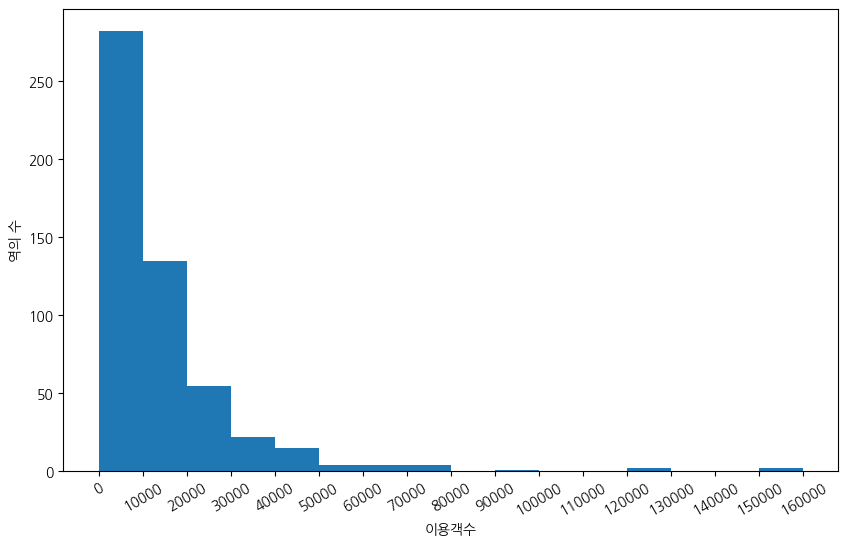

In [106]:
plt.figure(figsize=(10,6))
plt.hist(users, bins=16,range=(0, 160000))
plt.xlabel('이용객수')
plt.ylabel('역의 수')
plt.xticks(np.linspace(0,160000,17),rotation=30)
plt.show()